# Challenge - Airbnb listings in Paris 🏡

**Q1**. 🇫🇷 Download and load data of **Airbnb Paris listings** from http://insideairbnb.com/.

> 🔦 **Hint**: For extracting a `.gz` file using command line, run:
>
> `gunzip archive.gz`

- How many lines and columns does it contain?
- As it contains many columns, some do not appear with `head` method. Print the names of the different columns.

In [27]:
# TODO - Download and load dataset
from google.colab import files
data_to_load = files.upload()


Saving listings.csv to listings (2).csv


In [68]:
# TODO - Download and load dataset
import pandas as pd
data = pd.read_csv("listings.csv",parse_dates=['last_scraped'])

In [69]:
# TODO - Get shape, print columns
print("The shape of the dataframe is",data.shape)
print("The features are",data.columns)
data.head()
data.info()


The shape of the dataframe is (67942, 75)
The features are Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'mi

Notice that in columns calendar_updated, neighbourhood_group_cleansed , bathrooms all values are null, so, there in no need to keep them


In [70]:
#TODO - Clean dataset
#remove null colums
data = data.drop(["neighbourhood_group_cleansed","calendar_updated","bathrooms"],axis=1)
data.shape

(67942, 72)

**Q2**. Let's clean a bit this dataset:
- Does it contain only data from Paris city? If not make sure to filter only on Paris listings.
- Also, keep only listings with location as exact (`is_location_exact` column)

In [71]:
#TODO - Clean dataset
data.head()
data['host_location'].unique()

df_paris = data[data['host_location'].str.contains('Paris', case=False, na=False)]
df_paris.shape

(47578, 72)

In [72]:
df_paris.host_location.unique()

array(['Paris, France', 'Paris, AR', 'Paris, TX', 'Paris, NY',
       'Cormeilles-en-Parisis, France', 'Seyssinet-Pariset, France',
       'Paris, Denmark'], dtype=object)

In [74]:
#The second condition is to consider only adress in Paris France( because there is town Paris is NY, and danemark)
#the third condition is to exclude adress like Cormeilles-en-Parisis, France', 'Seyssinet-Pariset, France'
df = data[data['host_location'].str.contains('Paris', case=False, na=False) & data['host_location'].str.contains('France', case=False, na= False) & ~data['host_location'].str.contains('Pariset', case=False, na=False) & ~data['host_location'].str.contains('Parisis', case=False, na=False)]
df.shape

(47560, 72)

**Q3**. Let's understand better the listings price and draw some visualization with Seaborn
- Observe price distribution with a **box plot** - Reference: https://en.wikipedia.org/wiki/Box_plot
- Do you think there are some outliers? If yes, remove them
- Finally, visualize the cleaned distribution of the listings price with a **histrogram plot**
- Comment

> 🔦 **Hint**:  You might want to clean the column before starting your analysis 🙂
>
> In order to apply a defined function `my_func` to a column (Series), you can use `apply` method:
> ``` python
>  data[column_name].apply(lambda x: my_func(x))
> ```

In [75]:
def clean_price(x):

  return x.replace("$", "").replace(",", "")

df['price'] = df['price'].apply(lambda x: clean_price(x))



<ipython-input-75-c9990687b9ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].apply(lambda x: clean_price(x))


In [76]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['price'][:10]
df['price'].dtype


<ipython-input-76-5ef6fa97a08e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


dtype('float64')

<Axes: xlabel='price'>

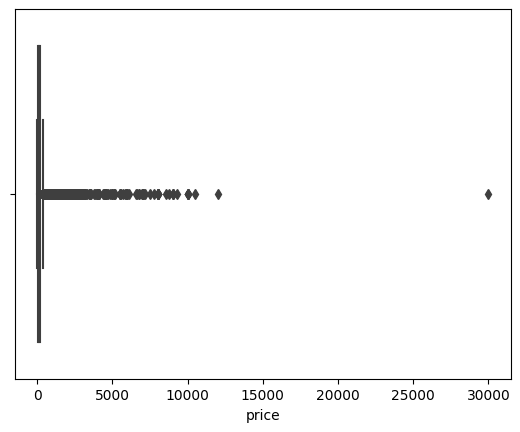

In [77]:
#TODO - Visualize Price Distribution
import seaborn as sns
sns.boxplot(x=df['price'])

We notice that there are too many outlires, we cannot see the moustache box
Let remove some of them

<Axes: xlabel='price'>

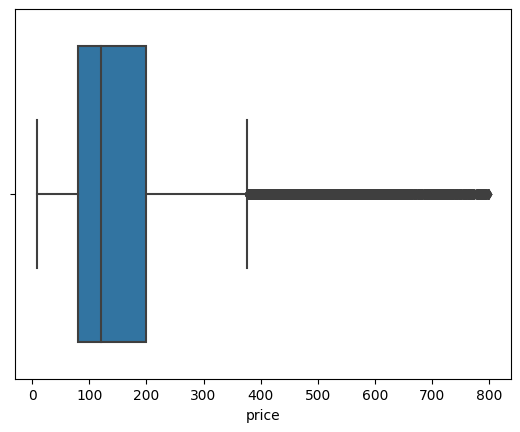

In [78]:
#TODO - Visualize Price Distribution
#remove outliers on the column price
df_cleaned = df[df['price'] < 800]
sns.boxplot(x=df_cleaned['price'])

<ipython-input-79-b04ba8aaeea6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['price'])


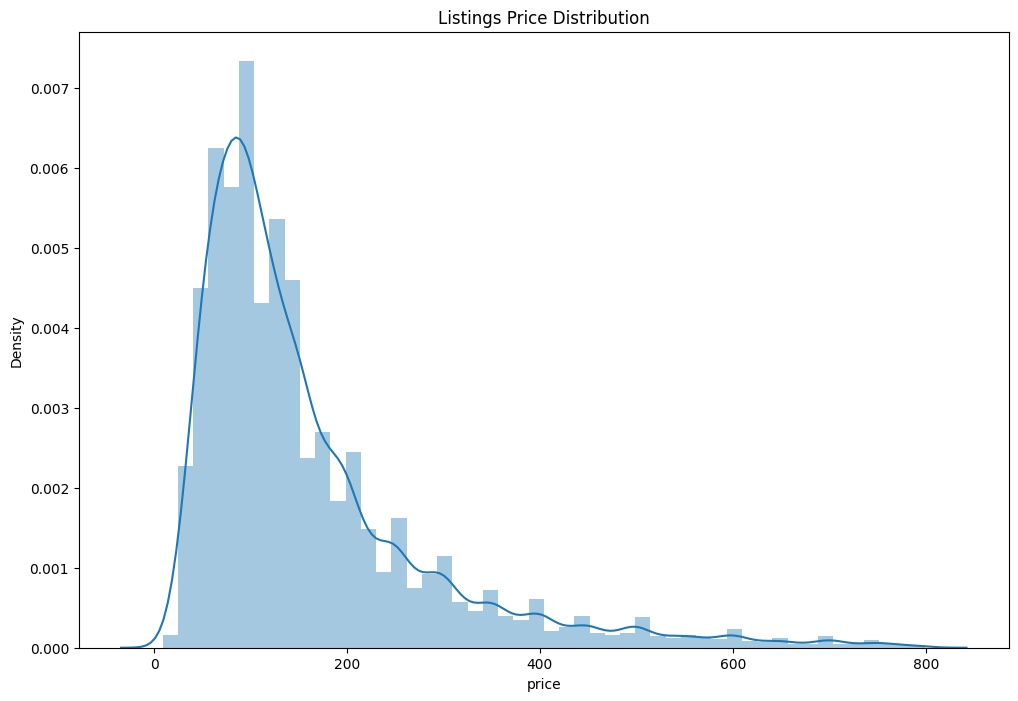

In [79]:
#TODO - Visualize Price Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.distplot(df_cleaned['price'])
plt.title("Listings Price Distribution")
plt.show()

In [80]:
#TODO - Visualize Price distribution
df_cleaned['price'].describe()

count    46462.000000
mean       159.886961
std        123.641487
min          9.000000
25%         80.000000
50%        120.000000
75%        199.000000
max        799.000000
Name: price, dtype: float64

- Almost all listings (99%) have a price contained within 0 and 200$ daily.

- 50% of listings have a price that vary between 80$  &  200$ (IQR). 50% outside this range.

- Overall, the mean price is around 159$ daily.



**Q4**. Let's try to get a better understanding of price variation by visualizing geographically our data:
- Visualize the listings categorized as "Entire Home/apt" on a map.

> 🔦 **Hint**: No need for complex functions, `sns.scatterplot` should work perfectly!

- Visualize this same map with varying color depending on the price
- Make sure the column `neighbourhood_cleansed` is cleaned by observing the data points with varying color depending on the neighbourhood

In [83]:
df_cleaned['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [84]:
df_entire = df[df['room_type'] == 'Entire home/apt']
df_entire.shape



(41411, 72)

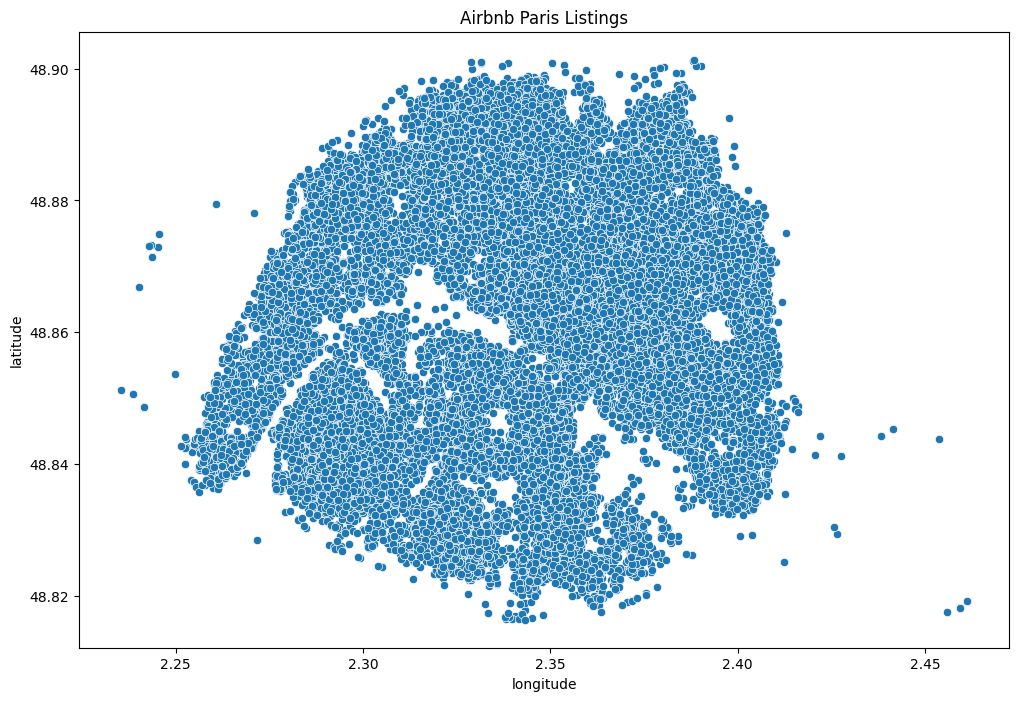

In [85]:
#TODO - Geo Visualization

plt.figure(figsize=(12, 8))
plt.title("Airbnb Paris Listings -Entire home/apt")
sns.scatterplot(x="longitude", y="latitude",data = df_entire)
plt.show()

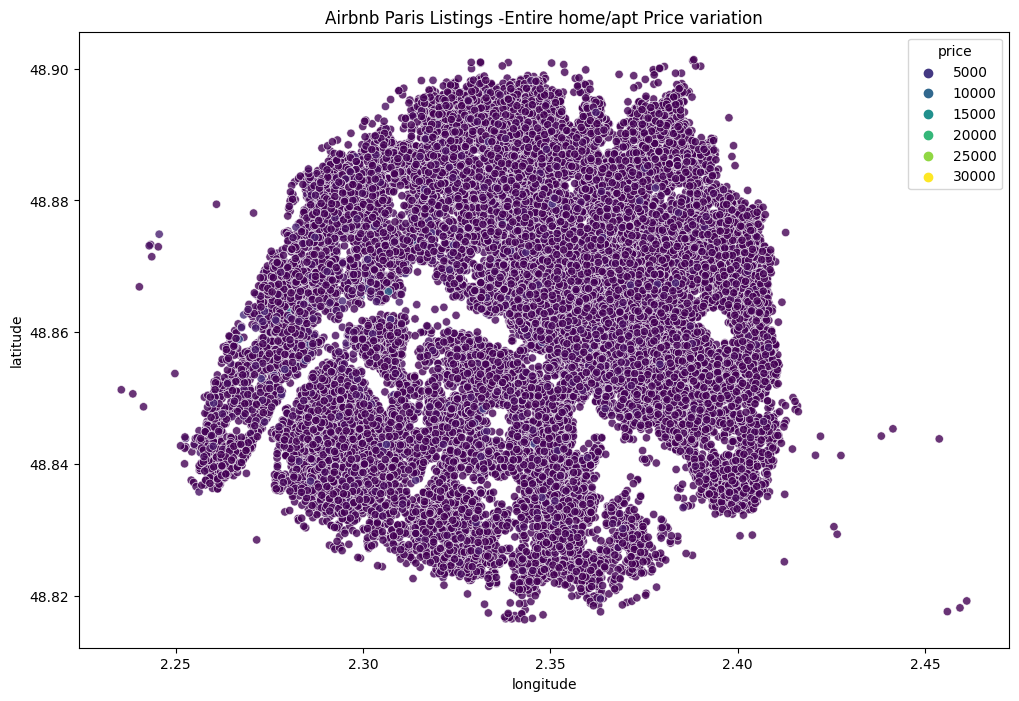

In [91]:
#TODO - Geo Visualization
plt.figure(figsize=(12,8))
sns.scatterplot()
sns.scatterplot(x="longitude", y="latitude",
                hue ="price",
                alpha=0.8,
                palette="viridis",
                data = df_entire)
plt.title("Airbnb Paris Listings -Entire home/apt Price variation")

plt.show()

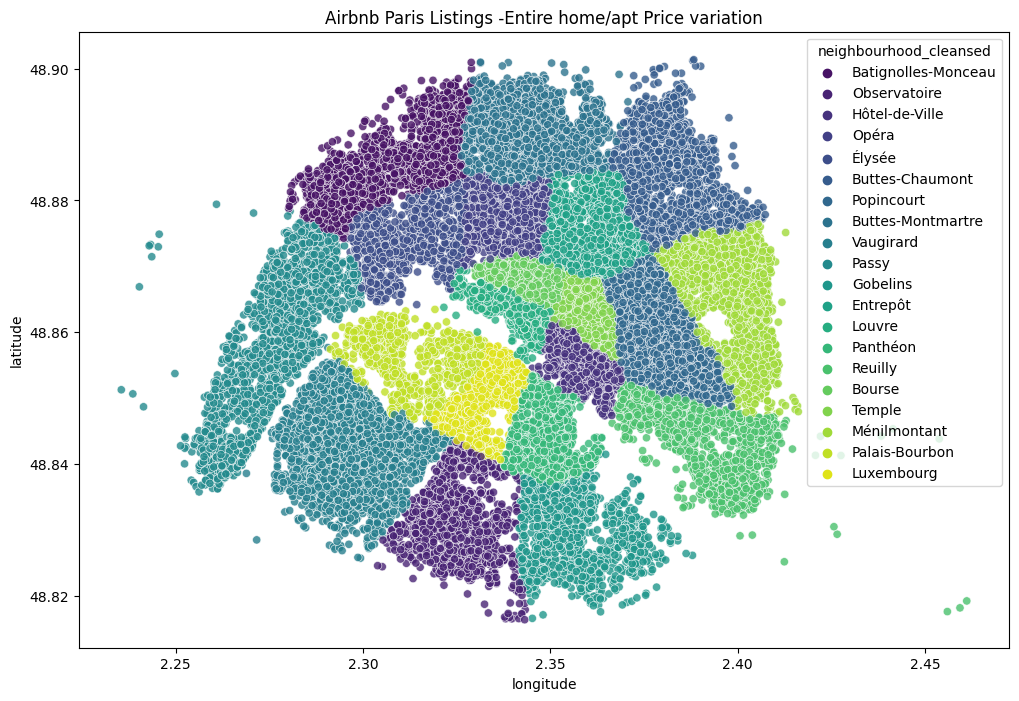

In [94]:
#TODO - Geo Visualization
plt.figure(figsize=(12,8))
sns.scatterplot()
sns.scatterplot(x="longitude", y="latitude",
                hue ="neighbourhood_cleansed",
                alpha=0.8,
                palette="viridis",
                data = df_entire)
plt.title("Airbnb Paris Listings -Entire home/apt Price variation")

plt.show()

**Q5**. Compute **median price depending on the neighbourhood**. Which districts appear the most and the less expensive?

Draw a nice visualization of these prices discrepancies (differences).

In [103]:
#TODO - Price per district

median_price_district =  df.groupby(df_entire['neighbourhood_cleansed'])['price'].median().sort_values()
print(median_price_district)


neighbourhood_cleansed
Ménilmontant            95.0
Buttes-Chaumont        100.0
Gobelins               108.0
Reuilly                110.0
Buttes-Montmartre      110.0
Observatoire           110.0
Popincourt             120.0
Batignolles-Monceau    120.0
Entrepôt               129.0
Vaugirard              130.0
Opéra                  150.0
Panthéon               150.0
Passy                  160.0
Palais-Bourbon         181.0
Luxembourg             182.0
Temple                 183.0
Hôtel-de-Ville         186.0
Bourse                 186.0
Élysée                 211.0
Louvre                 219.5
Name: price, dtype: float64


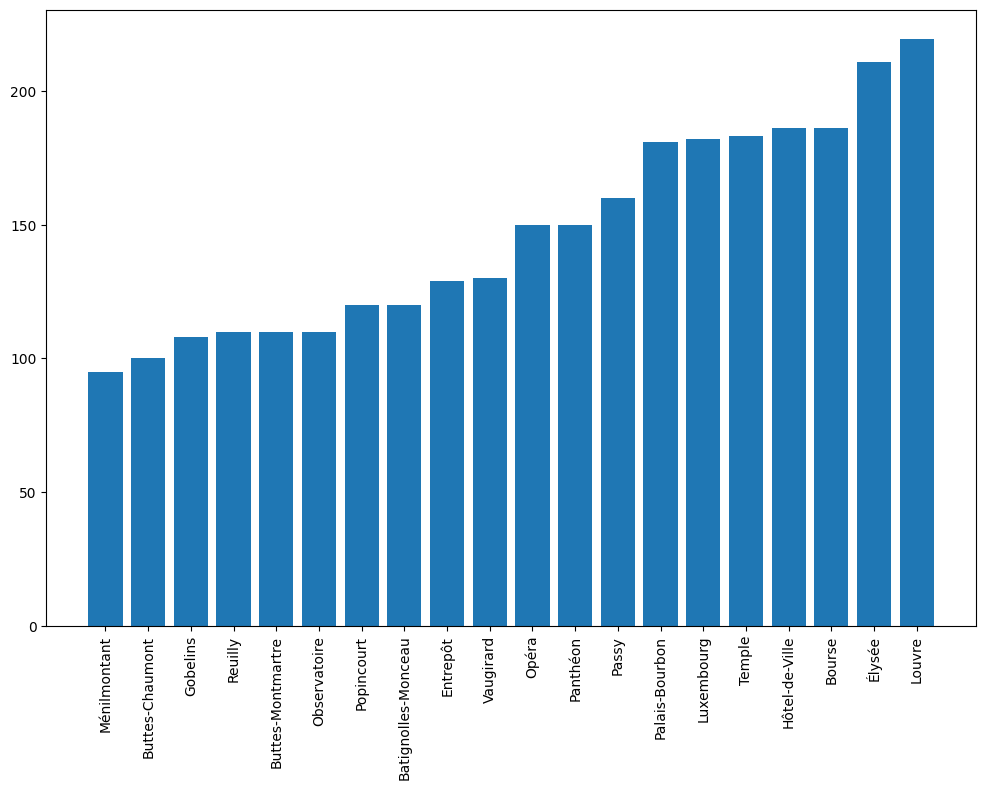

In [104]:
#TODO - Price per district
plt.figure(figsize=(12, 8))
plt.bar(x=median_price_district.index,height=median_price_district)
plt.xticks(rotation=90)
plt.show()

In [108]:
#TODO - Price per district

# To create new column `median_price_district`, we apply the function lambda
# that maps the key district to its mean price. Ex: median_price_per_district["Louvre"] = 115
df_entire["median_price_district"] = df_entire["neighbourhood_cleansed"].apply(
    lambda x: median_price_district[x])



<ipython-input-108-093e526a60e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entire["median_price_district"] = df_entire["neighbourhood_cleansed"].apply(


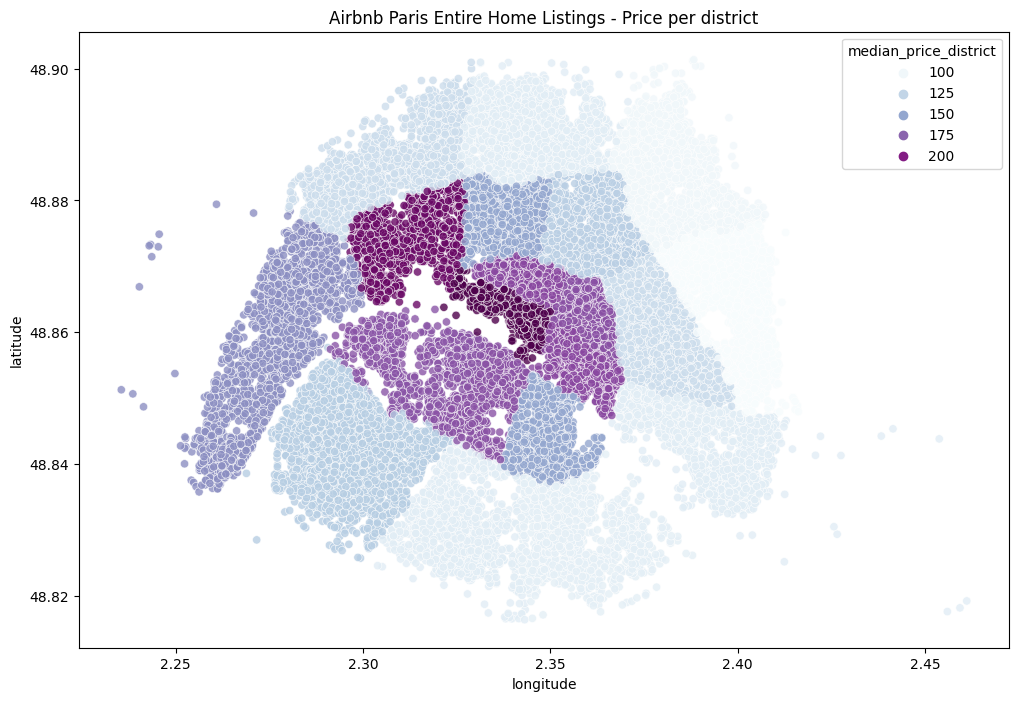

In [109]:
#TODO - Price per district
plt.figure(figsize=(12, 8))
plt.title("Airbnb Paris Entire Home Listings - Price per district")
sns.scatterplot(x="longitude",
                y="latitude",
                hue="median_price_district",
                alpha=0.8,
                palette="BuPu",
                data=df_entire)
plt.show()

Central neighbourhoods appear more expensive as expected!


**Q6**. Play with the dataset and draw nice and impactful visualizations!

In [ ]:
#TODO - More dataviz!